<a href="https://colab.research.google.com/github/impos0108/AI_basic_for_atmospheric_science/blob/main/CNN_filter_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt

In [3]:
# VGG16 모델 로드
vgg16 = models.vgg16(pretrained=True)

# 첫 번째 Convolution Layer 선택
first_conv_layer = vgg16.features[0]

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:11<00:00, 47.1MB/s]


Filter Shape: torch.Size([64, 3, 3, 3])


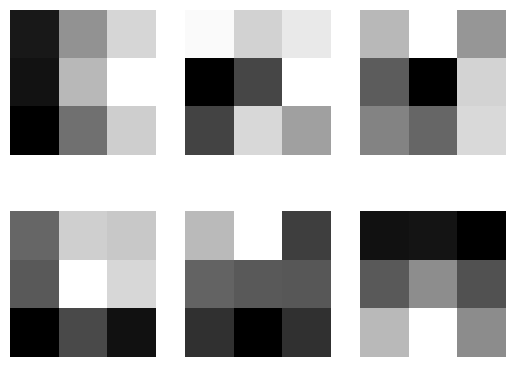

In [4]:
# 필터 (Kernel) 가져오기
filters = first_conv_layer.weight.data

# 필터의 크기를 확인하고 시각화
print("Filter Shape:", filters.shape)  # (out_channels, in_channels, kernel_size, kernel_size)

# 6개의 필터를 시각화 (더 많은 필터를 보려면 range 값을 변경)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(filters[i][0], cmap='gray')
    plt.axis('off')

plt.show()

Filter Shape: torch.Size([512, 512, 3, 3])


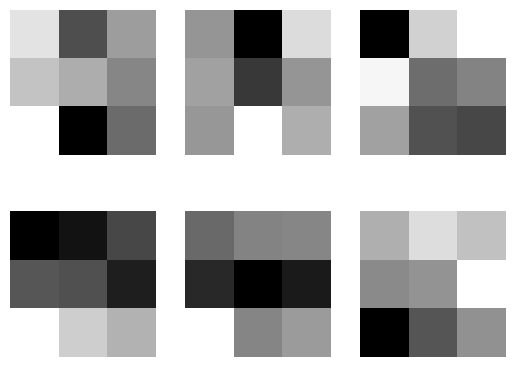

In [5]:
# 마지막 Convolution Layer 선택
# VGG16의 features 모듈 내의 마지막 Convolutional 레이어는 보통 28번 인덱스에 있습니다.
last_conv_layer = vgg16.features[28]

# 필터 (Kernel) 가져오기
filters = last_conv_layer.weight.data

# 필터의 크기를 확인하고 시각화
print("Filter Shape:", filters.shape)  # (out_channels, in_channels, kernel_size, kernel_size)

# 첫 6개의 필터를 시각화 (더 많은 필터를 보려면 range 값을 변경)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(filters[i][0].cpu().detach().numpy(), cmap='gray')  # 첫 번째 채널만 시각화
    plt.axis('off')

plt.show()

In [36]:
import torchvision.transforms as transforms
import torchvision

# 데이터 로드
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)


Files already downloaded and verified


PyTorch에서 "hook"이란, 텐서나 모듈에 연산을 적용하기 전이나 후에 추가로 실행되는 사용자 정의 함수를 의미합니다. 즉, 특정 레이어나 텐서에 추가적인 연산을 "걸어두"는 역할을 합니다.

Hook은 대게 아래 두 가지 상황에서 주로 사용됩니다:

Forward Hook: 모듈의 forward 메소드가 호출될 때 실행됩니다. 특정 레이어의 출력을 가져오거나 수정할 때 유용합니다.
Backward Hook: 텐서의 gradient 연산이 이루어질 때 실행됩니다. Gradient 값을 수정하거나 저장할 때 유용합니다.

---------------------------------------------------------------------------

In PyTorch, a "hook" is a user-defined function that is executed either before or after an operation is applied to a tensor or module. In other words, it serves to "attach" additional operations to specific layers or tensors.

Hooks are typically used in two main scenarios:

Forward Hook: Executed when a module's forward method is called. This is useful for capturing or modifying the output of a specific layer.
Backward Hook: Executed when the gradient operation is performed on a tensor. This is useful for modifying or capturing the gradient values.
These hooks provide a way to easily access internal states or intermediate results within a model, making them useful for debugging, visualization, and other tasks.

Feature Maps Shape: (64, 224, 224)


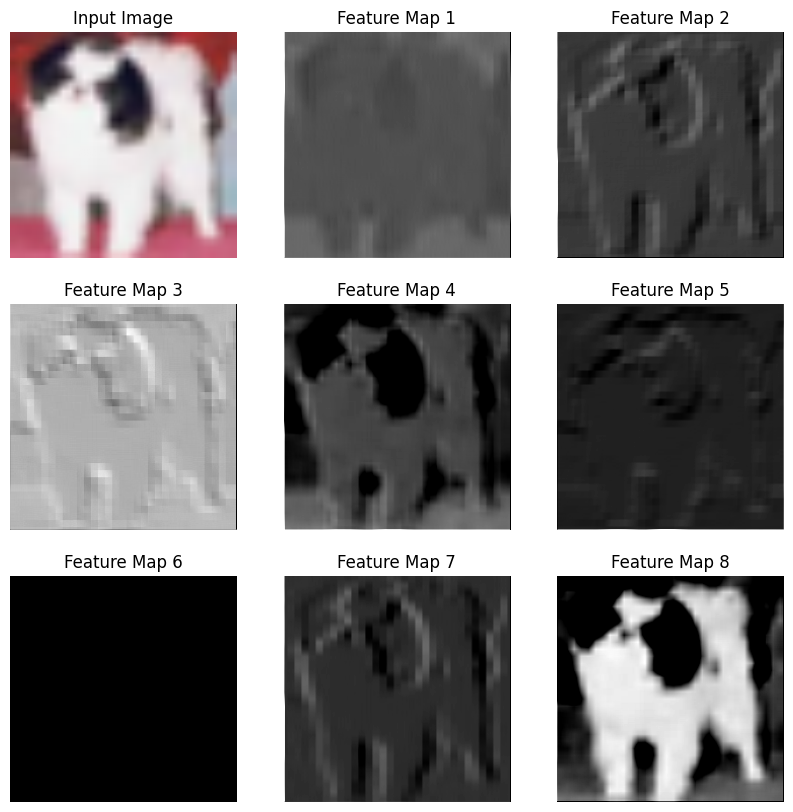

In [37]:
import numpy as np
vgg16.eval()

# Forward Hook 설정
activation1 = None
def hook_fn(module, input, output):
    global activation1
    activation1 = output

# 첫 번째 컨볼루션 레이어에 Hook 등록
vgg16.features[0].register_forward_hook(hook_fn)

# 이미지를 모델에 통과
with torch.no_grad():
    output = vgg16(images)

# 첫 번째 레이어를 통과한 Feature Map
feature_maps = activation1[0].cpu().detach().numpy()

print("Feature Maps Shape:", feature_maps.shape)  # (num_filters, height, width)

plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.title("Input Image")
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.axis('off')

# Feature Maps 시각화
for i in range(8):
    plt.subplot(3, 3, i+2)
    plt.title(f"Feature Map {i+1}")
    plt.imshow(feature_maps[i], cmap='gray')
    plt.axis('off')

plt.show()

Feature Maps Shape: (512, 7, 7)


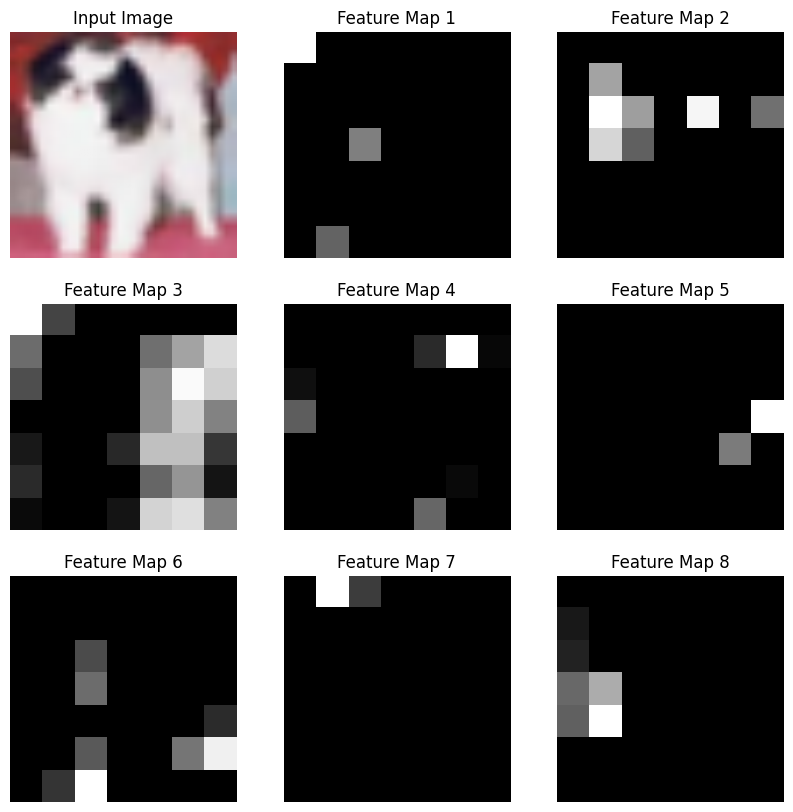

In [38]:
import numpy as np
vgg16.eval()

# Forward Hook 설정
activation2 = None
def hook_fn(module, input, output):
    global activation2
    activation2 = output

# 첫 번째 컨볼루션 레이어에 Hook 등록
vgg16.features[10].register_forward_hook(hook_fn)

# 이미지를 모델에 통과
with torch.no_grad():
    output = vgg16(images)

# 첫 번째 레이어를 통과한 Feature Map
feature_maps = activation2[0].cpu().detach().numpy()

print("Feature Maps Shape:", feature_maps.shape)  # (num_filters, height, width)

plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.title("Input Image")
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.axis('off')

# Feature Maps 시각화
for i in range(8):
    plt.subplot(3, 3, i+2)
    plt.title(f"Feature Map {i+1}")
    plt.imshow(feature_maps[i], cmap='gray')
    plt.axis('off')

plt.show()

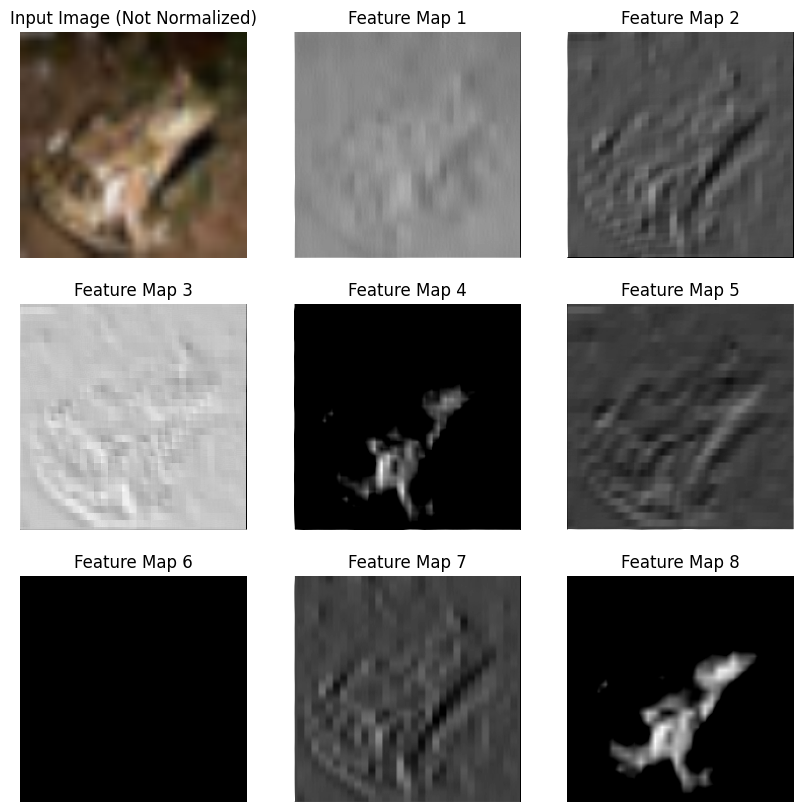

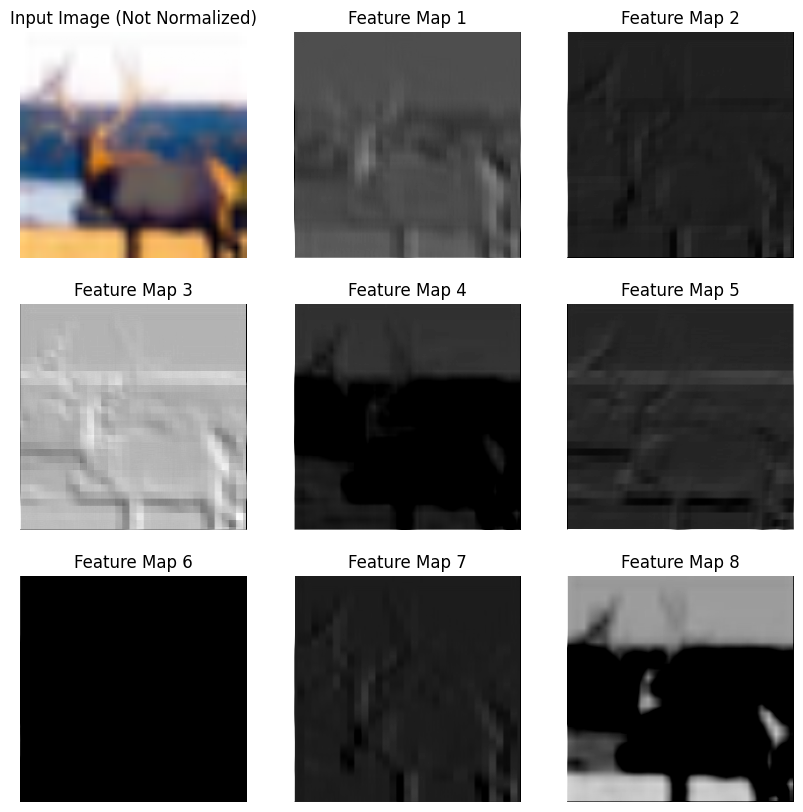

In [40]:
from PIL import Image

vgg16.eval()

# Forward Hook 설정
activation3 = None
def hook_fn(module, input, output):
    global activation3
    activation3 = output

# 첫 번째 컨볼루션 레이어에 Hook 등록
vgg16.features[0].register_forward_hook(hook_fn)

def draw_feature_maps():
    # 이미지 한 장 로드
    dataiter = iter(trainloader)
    images, labels = next(dataiter)


    # 이미지를 모델에 통과
    with torch.no_grad():
        output = vgg16(images)

    # Feature Map 가져오기
    feature_maps = activation3[0].cpu().detach().numpy()

    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1)
    plt.title("Input Image (Not Normalized)")
    plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
    plt.axis('off')

    # Feature Maps 표시
    for i in range(8):
        plt.subplot(3, 3, i+2)
        plt.title(f"Feature Map {i+1}")
        plt.imshow(feature_maps[i], cmap='gray')
        plt.axis('off')

    plt.show()


# 첫 번째 이미지에 대한 Feature Map
draw_feature_maps()

# 두 번째 이미지에 대한 Feature Map
draw_feature_maps()
